### EDA with Target Labels and Feature Creation

In [1]:
import numpy as np
import pandas as pd
import boto3
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.options.display.float_format = '{:.4f}'.format

### Loading Data via S3

In [ ]:
bucket='ads-508-group-6-raw'
data_key = 'transactions_train.csv'

s3 = boto3.client('s3')
transactions_obj = s3.get_object(Bucket = bucket, Key = data_key)

transactions_df = pd.read_csv(transactions_obj['Body'])

### Loading Data Locally

In [5]:
df = pd.read_csv("C:\\Users\\garyb\\OneDrive\\Documents\\GitHub\\recommendation-engine\\data\\customers_processed_part_3.csv")

In [6]:
df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,churn,lifetime_days_min_max,lifetime_articles_purchased,lifetime_amount_spent,lifetime_sales_channel_1_proportion,lifetime_average_amount_spent_per_article,lifetime_average_days_between_purchase,quarter_days_min_max,quarter_articles_purchased,quarter_amount_spent,quarter_sales_channel_1_proportion,quarter_average_amount_spent_per_article,quarter_average_days_between_purchase
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0000,0.0000,ACTIVE,NONE,49.0000,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,1.0000,450,20,0.5982,1.0000,0.0299,0.0013,0,5,0.0936,1.0000,0.0187,0.0000
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0000,0.0000,ACTIVE,NONE,25.0000,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,0.0000,527,71,2.2378,1.0000,0.0315,0.0042,40,19,0.4726,1.0000,0.0249,0.0118
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0000,0.0000,ACTIVE,NONE,24.0000,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,0.0000,501,7,0.2151,1.0000,0.0307,0.0004,0,3,0.0694,1.0000,0.0231,0.0000
3,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,0.0000,0.0000,ACTIVE,NONE,20.0000,2c29ae653a9282cce4151bd87643c907644e09541abc28...,1.0000,0,2,0.0534,1.0000,0.0267,0.0000,0,2,0.0534,1.0000,0.0267,0.0000
4,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,1.0000,1.0000,ACTIVE,Regularly,56.0000,b31984b20a8c478de38eaf113c581ff64e63c4242e607b...,0.0000,526,111,3.5527,1.0000,0.0320,0.0068,71,21,0.6582,1.0000,0.0313,0.0093


In [7]:
cat_variables = ['FN',
                 'Active', 
                 'club_member_status',
                 'fashion_news_frequency']
num_variables = ['age', 
                 'lifetime_days_min_max', 
                 'lifetime_articles_purchased', 
                 'lifetime_amount_spent', 
                 'lifetime_average_amount_spent_per_article', 
                 'lifetime_average_days_between_purchase', 
                 'lifetime_sales_channel_1_proportion',
                 'quarter_days_min_max', 
                 'quarter_articles_purchased', 
                 'quarter_amount_spent', 
                 'quarter_average_amount_spent_per_article', 
                 'quarter_average_days_between_purchase', 
                 'quarter_sales_channel_1_proportion']

## Univariate EDA

### Categorical Data

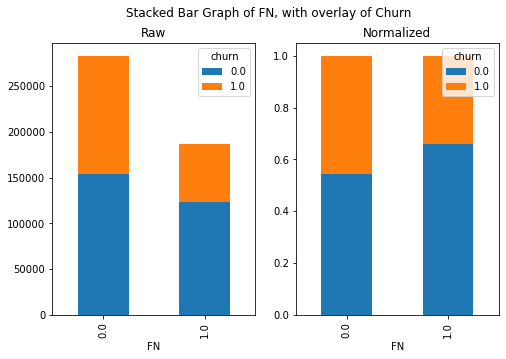

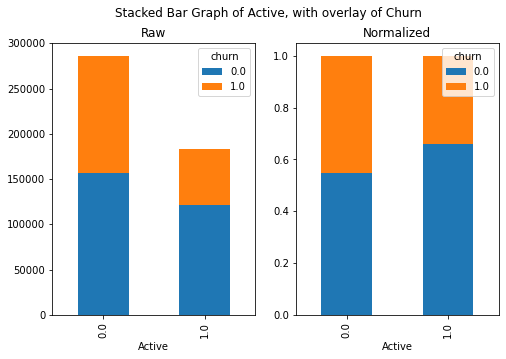

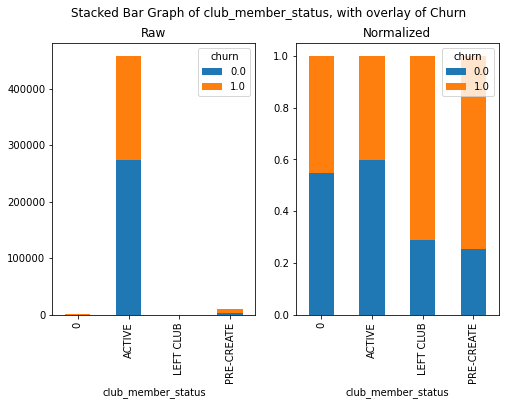

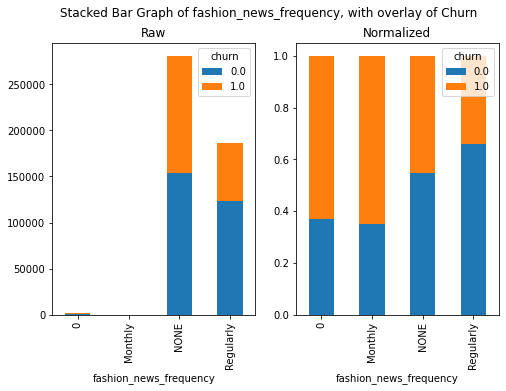

In [9]:
for col in cat_variables:
    crosstab = pd.crosstab(df[col], df['churn'])
    crosstab_norm = crosstab.div(crosstab.sum(1), axis = 0)
    fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols= 2)
    fig.suptitle('Stacked Bar Graph of {}, with overlay of Churn'.format(col))
    ax1.set_title('Raw')
    crosstab.plot(kind = 'bar', ax = ax1, stacked = True, figsize = (8,5), sort_columns = True)
    ax2.set_title('Normalized')
    crosstab_norm.plot(kind = 'bar', ax = ax2, stacked = True, figsize = (8,5), sort_columns = True)

In [10]:
print('Categorical Churn Split')
print(df.churn.value_counts(normalize = True))
print('\n')
for col in cat_variables:
    ct_1 = pd.crosstab(df['churn'], df[col])
    ct_2 = pd.crosstab(df['churn'], 
                       df[col],
                       normalize = 'columns')
    print('{} Values'.format(col))
    print(ct_1)
    print('\n')
    print('{} Percentages'.format(col))
    print(ct_2)
    print('\n')

Categorical Churn Split
0.0000   0.5910
1.0000   0.4090
Name: churn, dtype: float64


FN Values
FN      0.0000  1.0000
churn                 
0.0000  154310  123110
1.0000  128672   63284


FN Percentages
FN      0.0000  1.0000
churn                 
0.0000  0.5453  0.6605
1.0000  0.4547  0.3395


Active Values
Active  0.0000  1.0000
churn                 
0.0000  156180  121240
1.0000  129798   62158


Active Percentages
Active  0.0000  1.0000
churn                 
0.0000  0.5461  0.6611
1.0000  0.4539  0.3389


club_member_status Values
club_member_status    0  ACTIVE  LEFT CLUB  PRE-CREATE
churn                                                 
0.0000              380  274300         22        2718
1.0000              316  183685         54        7901


club_member_status Percentages
club_member_status      0  ACTIVE  LEFT CLUB  PRE-CREATE
churn                                                   
0.0000             0.5460  0.5989     0.2895      0.2560
1.0000             0.4540  0.4

### Numerical Data

<ipython-input-11-c5444a3b2da1>:10: RuntimeWarning: invalid value encountered in true_divide
  n_norm = np.true_divide(n_table, n_sum)
<ipython-input-11-c5444a3b2da1>:10: RuntimeWarning: invalid value encountered in true_divide
  n_norm = np.true_divide(n_table, n_sum)
<ipython-input-11-c5444a3b2da1>:10: RuntimeWarning: invalid value encountered in true_divide
  n_norm = np.true_divide(n_table, n_sum)
<ipython-input-11-c5444a3b2da1>:10: RuntimeWarning: invalid value encountered in true_divide
  n_norm = np.true_divide(n_table, n_sum)
<ipython-input-11-c5444a3b2da1>:10: RuntimeWarning: invalid value encountered in true_divide
  n_norm = np.true_divide(n_table, n_sum)
<ipython-input-11-c5444a3b2da1>:10: RuntimeWarning: invalid value encountered in true_divide
  n_norm = np.true_divide(n_table, n_sum)
<ipython-input-11-c5444a3b2da1>:10: RuntimeWarning: invalid value encountered in true_divide
  n_norm = np.true_divide(n_table, n_sum)
<ipython-input-11-c5444a3b2da1>:10: RuntimeWarning: inv

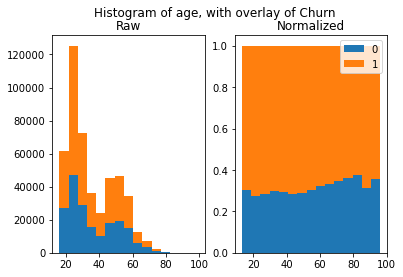

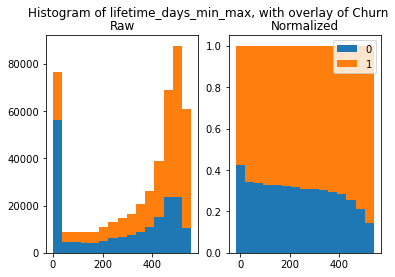

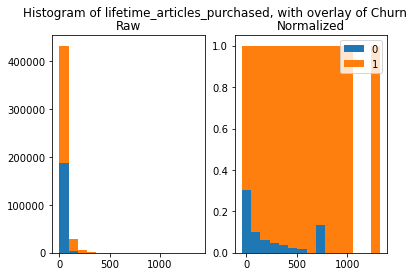

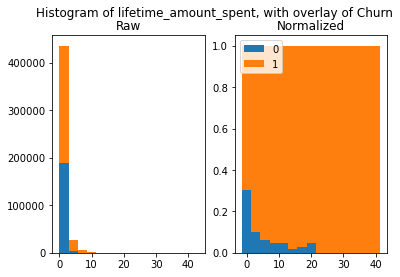

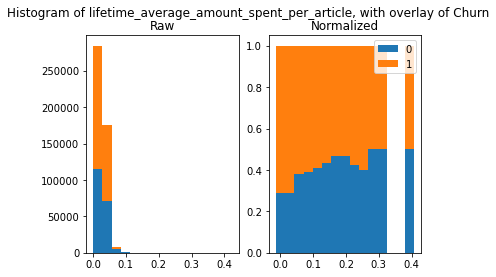

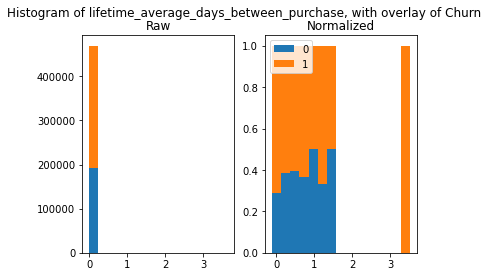

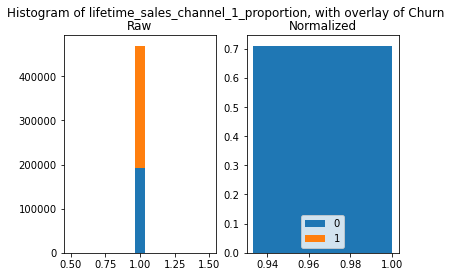

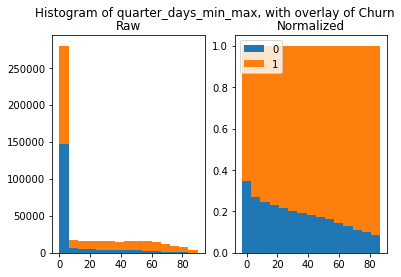

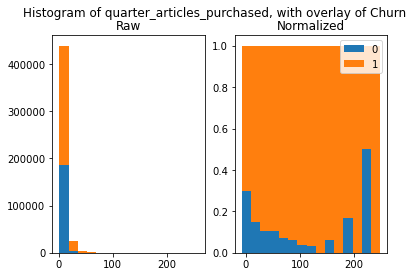

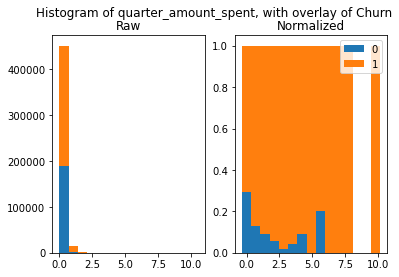

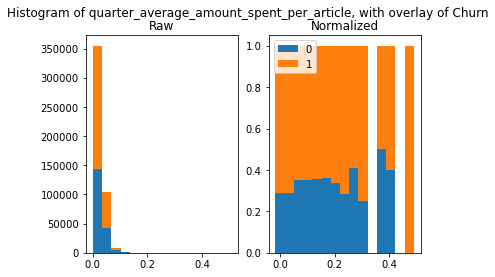

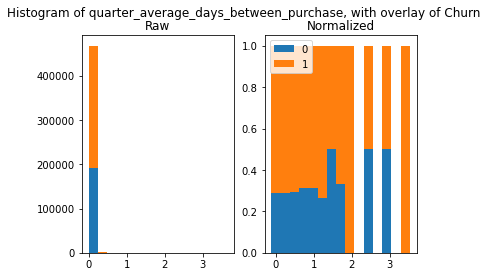

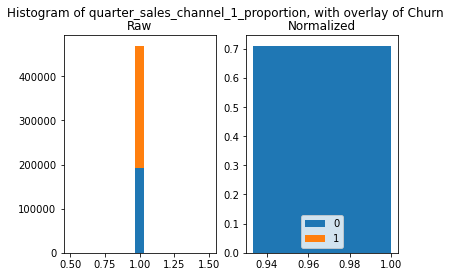

In [11]:
for col in num_variables:
    fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols= 2)

    y = df[df.churn == 1][col]
    n = df[df.churn == 0][col]
    
    n, bins, patches = ax1.hist([y, n], bins = 15, stacked = True, label = 'churn')
    n_table = np.column_stack((n[0], n[1]))
    n_sum = n_table.sum(axis=1)[:, None]
    n_norm = np.true_divide(n_table, n_sum)
    ourbins = np.column_stack((bins[0:15], bins[1:16]))
    
    ax2.bar(x = ourbins[:,0], 
            height = n_norm[:,1], 
            width = ourbins[:, 1] - ourbins[:, 0], 
            label = '0')
    ax2.bar(x = ourbins[:,0], 
            height = n_norm[:,1], 
            width = ourbins[:, 1] - ourbins[:, 0], 
            bottom = n_norm[:,0],
            label = '1')
    
    fig.suptitle('Histogram of {}, with overlay of Churn'.format(col))
    ax1.set_title('Raw')
    ax2.set_title('Normalized')
    plt.legend()

In [12]:
df[num_variables].describe()

,age,lifetime_days_min_max,lifetime_articles_purchased,lifetime_amount_spent,lifetime_average_amount_spent_per_article,lifetime_average_days_between_purchase,lifetime_sales_channel_1_proportion,quarter_days_min_max,quarter_articles_purchased,quarter_amount_spent,quarter_average_amount_spent_per_article,quarter_average_days_between_purchase,quarter_sales_channel_1_proportion
count,469376.0000,469376.0000,469376.0000,469376.0000,469376.0000,469376.0000,469376.0000,469376.0000,469376.0000,469376.0000,469376.0000,469376.0000,469376.0000
mean,35.7225,344.4508,34.7484,0.9875,0.0283,0.0034,1.0000,16.9649,6.6598,0.1872,0.0286,0.0084,1.0000
std,13.9363,191.1189,43.8546,1.3870,0.0109,0.0151,0.0000,24.7167,8.0090,0.2506,0.0146,0.0337,0.0000
min,16.0000,0.0000,1.0000,0.0008,0.0008,0.0000,1.0000,0.0000,1.0000,0.0001,0.0001,0.0000,1.0000
25%,24.0000,206.0000,8.0000,0.2077,0.0219,0.0007,1.0000,0.0000,2.0000,0.0508,0.0195,0.0000,1.0000
50%,31.0000,432.0000,21.0000,0.5430,0.0267,0.0016,1.0000,0.0000,4.0000,0.1067,0.0260,0.0000,1.0000
75%,48.0000,497.0000,45.0000,1.2038,0.0327,0.0032,1.0000,32.0000,8.0000,0.2235,0.0339,0.0061,1.0000
max,99.0000,558.0000,1375.0000,42.8785,0.4220,3.6465,1.0000,90.0000,257.0000,10.5247,0.5068,3.6465,1.0000


In [13]:
df[num_variables].skew()

age                                          0.6816
lifetime_days_min_max                       -0.8138
lifetime_articles_purchased                  3.8021
lifetime_amount_spent                        4.5120
lifetime_average_amount_spent_per_article    3.1804
lifetime_average_days_between_purchase      58.6805
lifetime_sales_channel_1_proportion          0.0000
quarter_days_min_max                         1.2311
quarter_articles_purchased                   4.4433
quarter_amount_spent                         5.0867
quarter_average_amount_spent_per_article     3.1242
quarter_average_days_between_purchase       20.5338
quarter_sales_channel_1_proportion           0.0000
dtype: float64

### Bivariate EDA

In [14]:
corr = df[num_variables].corr()
corr

,age,lifetime_days_min_max,lifetime_articles_purchased,lifetime_amount_spent,lifetime_average_amount_spent_per_article,lifetime_average_days_between_purchase,lifetime_sales_channel_1_proportion,quarter_days_min_max,quarter_articles_purchased,quarter_amount_spent,quarter_average_amount_spent_per_article,quarter_average_days_between_purchase,quarter_sales_channel_1_proportion
age,1.0000,0.0516,0.0261,0.0479,0.1389,0.0069,NaN,0.0106,-0.0087,0.0218,0.1035,0.0080,NaN
lifetime_days_min_max,0.0516,1.0000,0.4767,0.4361,-0.0613,-0.0681,NaN,0.3406,0.2303,0.2154,-0.0330,0.0311,NaN
lifetime_articles_purchased,0.0261,0.4767,1.0000,0.9495,0.0050,0.1263,NaN,0.4343,0.6602,0.6307,-0.0028,0.1182,NaN
lifetime_amount_spent,0.0479,0.4361,0.9495,1.0000,0.1601,0.1426,NaN,0.4074,0.6313,0.6762,0.1009,0.1301,NaN
lifetime_average_amount_spent_per_article,0.1389,-0.0613,0.0050,0.1601,1.0000,0.0811,NaN,-0.0096,0.0020,0.1823,0.6889,0.0660,NaN
lifetime_average_days_between_purchase,0.0069,-0.0681,0.1263,0.1426,0.0811,1.0000,NaN,0.0374,0.1646,0.1835,0.0546,0.4510,NaN
lifetime_sales_channel_1_proportion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quarter_days_min_max,0.0106,0.3406,0.4343,0.4074,-0.0096,0.0374,NaN,1.0000,0.5178,0.4789,-0.0200,-0.0098,NaN
quarter_articles_purchased,-0.0087,0.2303,0.6602,0.6313,0.0020,0.1646,NaN,0.5178,1.0000,0.9198,-0.0295,0.2340,NaN
quarter_amount_spent,0.0218,0.2154,0.6307,0.6762,0.1823,0.1835,NaN,0.4789,0.9198,1.0000,0.2032,0.2607,NaN


<AxesSubplot:>

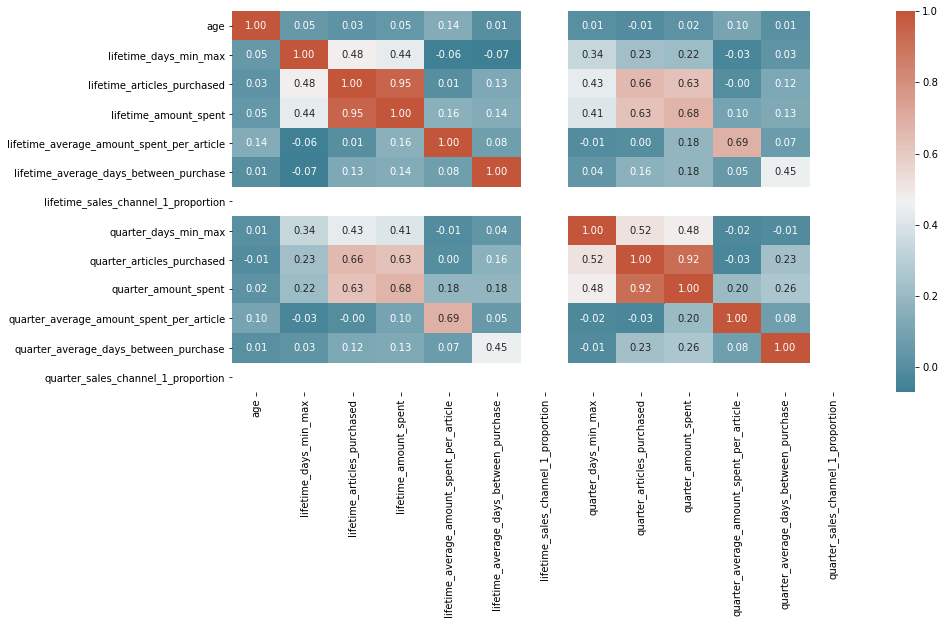

In [15]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plt.figure(figsize = (14,7))
sns.heatmap(corr, 
            cmap = cmap,
            annot = True , 
            fmt = '.2f')

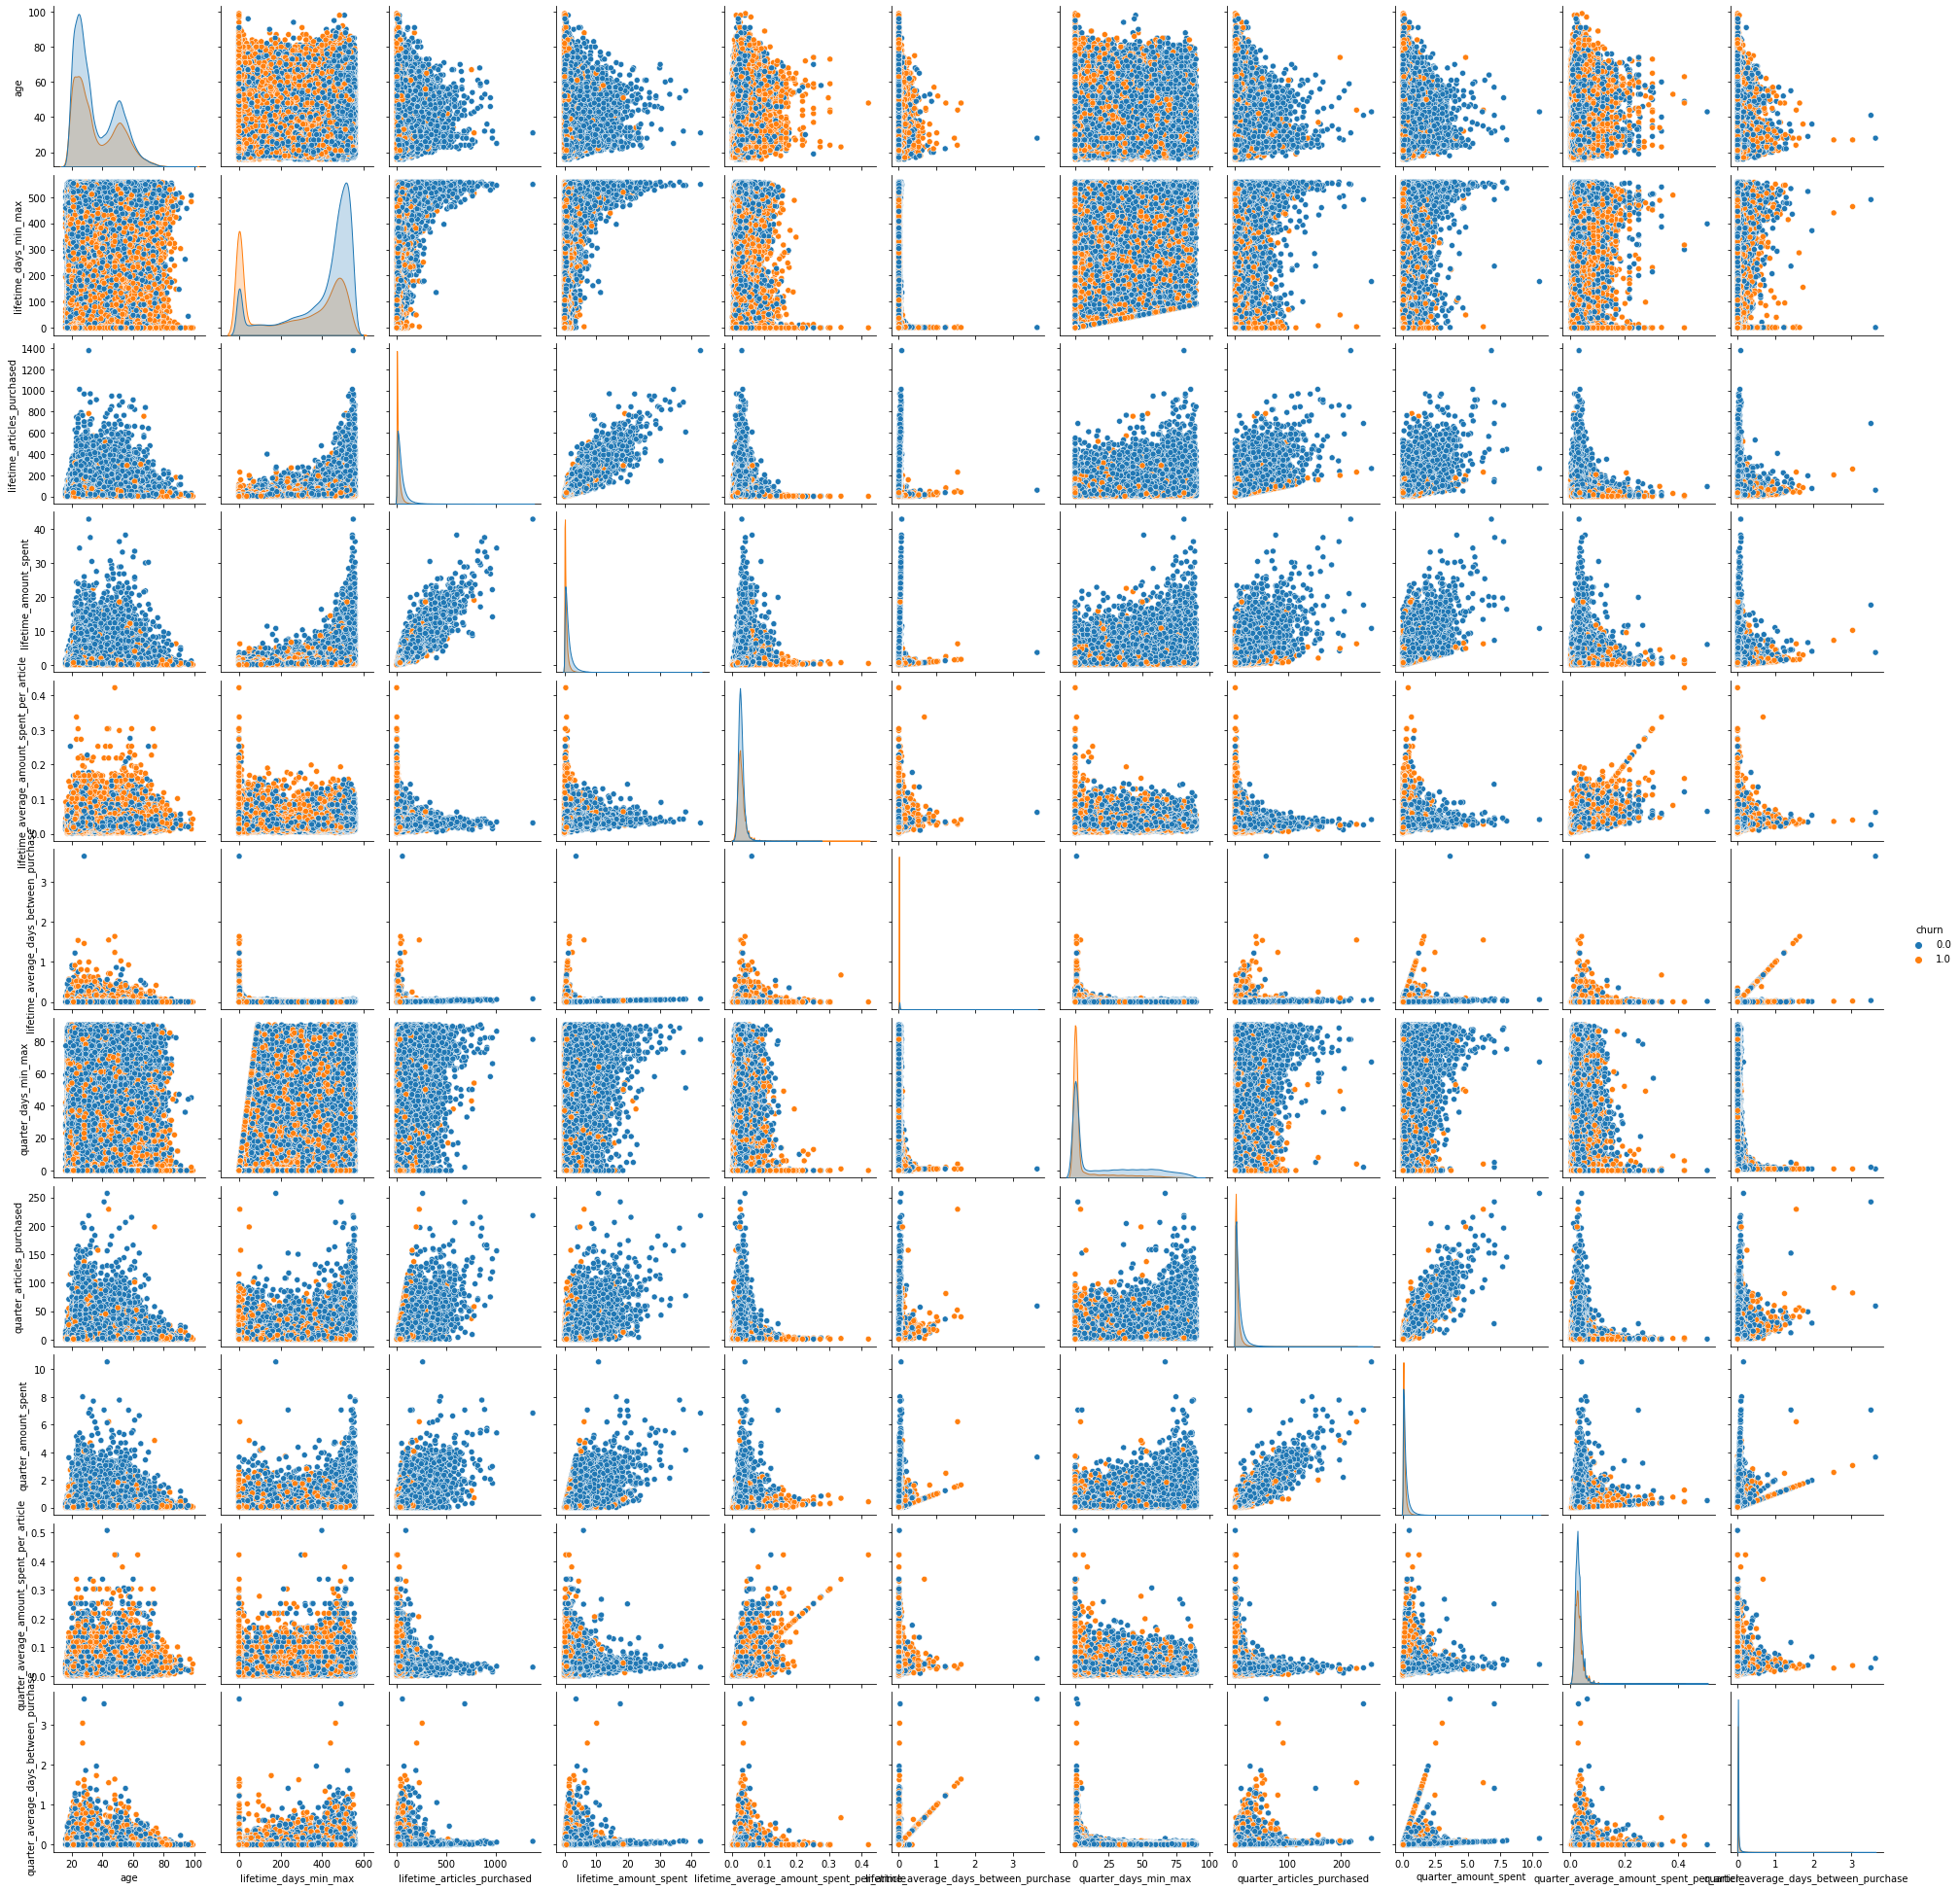

In [17]:
pair_plot_variables = ['age', 
                       'lifetime_days_min_max', 
                       'lifetime_articles_purchased', 
                       'lifetime_amount_spent', 
                       'lifetime_average_amount_spent_per_article', 
                       'lifetime_average_days_between_purchase', 
                       'quarter_days_min_max', 
                       'quarter_articles_purchased', 
                       'quarter_amount_spent', 
                       'quarter_average_amount_spent_per_article', 
                       'quarter_average_days_between_purchase', 
                       'churn']
sns.pairplot(df[pair_plot_variables], hue = 'churn')